In [1]:
import polars as pl
import pandas as pd
from pathlib import Path
import lightgbm as lgb
import xgboost as xgb
import catboost
import numpy as np

In [2]:
train_dir='parquet_files/train/'

In [3]:
import os
os.listdir(train_dir)

['train_applprev_1_0.parquet',
 'train_applprev_1_1.parquet',
 'train_applprev_2.parquet',
 'train_base.parquet',
 'train_credit_bureau_a_1_0.parquet',
 'train_credit_bureau_a_1_1.parquet',
 'train_credit_bureau_a_1_2.parquet',
 'train_credit_bureau_a_1_3.parquet',
 'train_credit_bureau_a_2_0.parquet',
 'train_credit_bureau_a_2_1.parquet',
 'train_credit_bureau_a_2_10.parquet',
 'train_credit_bureau_a_2_2.parquet',
 'train_credit_bureau_a_2_3.parquet',
 'train_credit_bureau_a_2_4.parquet',
 'train_credit_bureau_a_2_5.parquet',
 'train_credit_bureau_a_2_6.parquet',
 'train_credit_bureau_a_2_7.parquet',
 'train_credit_bureau_a_2_8.parquet',
 'train_credit_bureau_a_2_9.parquet',
 'train_credit_bureau_b_1.parquet',
 'train_credit_bureau_b_2.parquet',
 'train_debitcard_1.parquet',
 'train_deposit_1.parquet',
 'train_other_1.parquet',
 'train_person_1.parquet',
 'train_person_2.parquet',
 'train_static_0_0.parquet',
 'train_static_0_1.parquet',
 'train_static_cb_0.parquet',
 'train_tax_regis

In [4]:
files=['train_base.parquet',
       'train_person_1.parquet',
       'train_person_2.parquet',                                                                                 
    'train_applprev_1*.parquet',
             'train_applprev_2.parquet',
             'train_credit_bureau_a_1*.parquet',
             'train_credit_bureau_a_2*.parquet',
             'train_credit_bureau_b_1.parquet',
             'train_credit_bureau_b_2.parquet',
             'train_debitcard_1.parquet',
             'train_deposit_1.parquet',
             'train_other_1.parquet',
             'train_static_0*.parquet',
             'train_static_cb_0.parquet',
             'train_tax_registry_a_1.parquet',
             'train_tax_registry_b_1.parquet',
             'train_tax_registry_c_1.parquet']

In [5]:
def load_data(files, dir_):
    dfs=[]
    PATH=Path(dir_)
    for file in files:
        paths=PATH.glob(file)
        chunks=[]
        for path in paths:
            print(path)
            df=pl.read_parquet(path)
            chunks.append(df)        
        df=pl.concat(chunks, how='vertical_relaxed')
        df=df.filter(pl.col('case_id').is_in(case_id))
        dfs.append(df)        
    
    return dfs

In [6]:
case_id=pl.read_parquet(train_dir+'train_base.parquet')['case_id']

In [7]:
dfs=load_data(files, train_dir)

parquet_files/train/train_base.parquet
parquet_files/train/train_person_1.parquet
parquet_files/train/train_person_2.parquet
parquet_files/train/train_applprev_1_0.parquet
parquet_files/train/train_applprev_1_1.parquet
parquet_files/train/train_applprev_2.parquet
parquet_files/train/train_credit_bureau_a_1_0.parquet
parquet_files/train/train_credit_bureau_a_1_1.parquet
parquet_files/train/train_credit_bureau_a_1_2.parquet
parquet_files/train/train_credit_bureau_a_1_3.parquet
parquet_files/train/train_credit_bureau_a_2_0.parquet
parquet_files/train/train_credit_bureau_a_2_1.parquet
parquet_files/train/train_credit_bureau_a_2_10.parquet
parquet_files/train/train_credit_bureau_a_2_2.parquet
parquet_files/train/train_credit_bureau_a_2_3.parquet
parquet_files/train/train_credit_bureau_a_2_4.parquet
parquet_files/train/train_credit_bureau_a_2_5.parquet
parquet_files/train/train_credit_bureau_a_2_6.parquet
parquet_files/train/train_credit_bureau_a_2_7.parquet
parquet_files/train/train_credit_

In [8]:
n_rows=[]
n_columns=[]
perc_nulls=[]
for df in dfs:
    n_column=len(df.columns)
    n_row=len(df)
    perc_null=sum(df.null_count().row(0))/(n_row*n_column)
    n_rows.append(n_row)
    n_columns.append(n_column)
    perc_nulls.append(perc_null)    

In [9]:
df=pl.DataFrame({'files':files, 'n_rows':n_rows, 'n_columns':n_columns, 'perc_nulls':perc_nulls})

In [10]:
import matplotlib.pyplot as plt

In [11]:
internal=['train_static_0*.parquet', 
          'train_person_1.parquet', 
          'train_person_2.parquet', 
          'train_applprev_1*.parquet', 
          'train_debitcard_1.parquet', 
          'train_deposit_1.parquet', 
          'train_other_1.parquet',
          'train_applprev_2.parquet']
external=['train_static_cb_0.parquet', 
          'train_credit_bureau_a_1*.parquet', 
          'train_credit_bureau_b_1.parquet', 
          'train_tax_registry_a_1.parquet', 
          'train_tax_registry_b_1.parquet', 
          'train_tax_registry_c_1.parquet', 
          'train_credit_bureau_a_2*.parquet', 
          'train_credit_bureau_b_2.parquet']

In [12]:
internal_df=df.filter(pl.col('files').is_in(internal))

In [13]:
internal_df['files'].item(1)

'train_person_2.parquet'

In [14]:
df

files,n_rows,n_columns,perc_nulls
str,i64,i64,f64
"""train_base.parquet""",1526659,5,0.0
"""train_person_1.parquet""",2973991,37,0.463946
"""train_person_2.parquet""",1643410,11,0.267076
"""train_applprev_1*.parquet""",6525979,41,0.313248
"""train_applprev_2.parquet""",14075487,6,0.192258
…,…,…,…
"""train_static_0*.parquet""",1526659,168,0.306082
"""train_static_cb_0.parquet""",1500476,53,0.620881
"""train_tax_registry_a_1.parquet""",3275770,5,0.0


In [5]:
def cast_data(df):
    for col in df.columns:
        if col in ['case_id', 'NUM_WEEK', 'num_group1', 'num_group2']:
            df=df.with_columns(pl.col(col).cast(pl.Int32))
        if col[-1] in ['A', 'P']:
            df=df.with_columns(pl.col(col).cast(pl.Float32))
        elif (col[-1]=='M') & (col != 'WEEK_NUM'):
            df=df.with_columns(pl.col(col).cast(pl.String))
        elif (col[-1]=='D') | (col=='date_decision') :
            df=df.with_columns(pl.col(col).cast(pl.Date))
        elif df[col].dtype==pl.Boolean:
            df=df.with_columns(pl.col(col).cast(pl.String))
        # try: 
        #     if int(df[col].max()):
        #         df=df.with_columns(pl.col(col).cast(pl.Int64))
        # except TypeError:
        #     df=df.with_columns(pl.col(col).cast(pl.Date))
        # except ValueError:
        #     try: 
        #         if float(df[col].max()):
        #             df=df.with_columns(pl.col(col).cast(pl.Float64))
        #     except ValueError:
        #         df=df.with_columns(pl.col(col).cast(pl.String))
    return df

In [6]:
def aggregate_data(df):
    base_cols=[col for col in df.columns if col in ['case_id', 'date_decision', 'WEEK_NUM', 'MONTH', 'target']]
    base_agg=[pl.col(col).max() for col in base_cols if col !='case_id']
    
    cat_cols=[col for col in df.columns if (df[col].dtype ==pl.String) | (df[col].dtype==pl.Null) ]
    cat_max=[pl.col(col).max().alias('max_'+col) for col in cat_cols]
    cat_first=[pl.col(col).first().alias('first_'+col) for col in cat_cols]
    cat_last=[pl.col(col).last().alias('last_'+col) for col in cat_cols]
    cat_n_unique=[pl.col(col).n_unique().alias('n_unique_'+col) for col in cat_cols]
    
    d_cols=[col for col in df.columns if (df[col].dtype ==pl.Date)&(col!='date_decision')]
    d_max=[pl.col(col).max().alias('max_'+col) for col in d_cols]
    d_min=[pl.col(col).min().alias('min_'+col) for col in d_cols]
    d_median=[pl.col(col).median().alias('median_'+col) for col in d_cols]

    other_cols=[col for col in df.columns if col not in base_cols+cat_cols+d_cols]
    max_other=[pl.col(col).max().alias('max_'+col) for col in other_cols]
    mean_other=[pl.col(col).mean().alias('mean_'+col) for col in other_cols]
    min_other=[pl.col(col).min().alias('min_'+col) for col in other_cols]
    total=base_agg+cat_max+cat_first+cat_last+cat_n_unique+d_max+d_min+d_median+max_other+mean_other+min_other
    return total

In [7]:
def load_data(files, dir_):
    PATH=Path(dir_)
    for file in files:
        paths=PATH.glob(file)
        chunks=[]
        for path in paths:
            print(path)
            df=pl.read_parquet(path)
            df=cast_data(df)
            if ('1' in file)|('2' in file):
                df=df.group_by('case_id').agg(aggregate_data(df))
            chunks.append(df)        
        df=pl.concat(chunks, how='vertical_relaxed')
        df = df.unique(subset=["case_id"])
        if file in ['train_base.parquet','test_base.parquet']:
            base=df
            name=file
        else:
            for col in df.columns:
                if 'num_group' in col:
                    if name=='train_base.parquet':
                        df=df.rename({col:col+file[5:]})
                    if name=='test_base.parquet':
                        df=df.rename({col:col+file[4:]})        
            base=base.join(df, on='case_id', how='left')
    
    return base

In [8]:
df=load_data(files, train_dir)

parquet_files/train/train_base.parquet
parquet_files/train/train_person_1.parquet
parquet_files/train/train_person_2.parquet
parquet_files/train/train_applprev_1_0.parquet
parquet_files/train/train_applprev_1_1.parquet
parquet_files/train/train_applprev_2.parquet
parquet_files/train/train_credit_bureau_a_1_0.parquet
parquet_files/train/train_credit_bureau_a_1_1.parquet
parquet_files/train/train_credit_bureau_a_1_2.parquet
parquet_files/train/train_credit_bureau_a_1_3.parquet
parquet_files/train/train_credit_bureau_a_2_0.parquet
parquet_files/train/train_credit_bureau_a_2_1.parquet
parquet_files/train/train_credit_bureau_a_2_10.parquet
parquet_files/train/train_credit_bureau_a_2_2.parquet
parquet_files/train/train_credit_bureau_a_2_3.parquet
parquet_files/train/train_credit_bureau_a_2_4.parquet
parquet_files/train/train_credit_bureau_a_2_5.parquet
parquet_files/train/train_credit_bureau_a_2_6.parquet
parquet_files/train/train_credit_bureau_a_2_7.parquet
parquet_files/train/train_credit_

In [9]:
len(df.columns)

1094

In [10]:
def filter_cols(df):
    hashes=[df[col].hash().to_numpy().tobytes() for col in df.columns]
    seen_hashes=[]
    duplicated_cols=[]
    for i in range(len(hashes)):
        if hashes[i] not in seen_hashes:
            seen_hashes.append(hashes[i])
        else:
            duplicated_cols.append(df.columns[i])
    print(f'number of duplicated columns is {len(duplicated_cols)}')
    df=df.drop(duplicated_cols)

    constant_cols=[]
    for col in df.columns:
        if df[col].n_unique()<=1:
            constant_cols.append(col)
    print(f'number of constant columns is {len(constant_cols)}')        
    df=df.drop(constant_cols)

    # high_cardinality_cols=[]
    # for col in df.columns:
    #     if (df[col].n_unique()>200)&(df[col].dtype==pl.String):
    #         high_cardinality_cols.append(col)
    # print(f'number of high_cardinality columns is {len(high_cardinality_cols)}')        
    # df=df.drop(high_cardinality_cols)

    # high_null_cols=[]
    # for col in df.columns:
    #     if df[col].null_count()/len(df)>0.95:
    #         high_null_cols.append(col)
    # print(f'number of high null columns is {len(high_null_cols)}')        
    # df=df.drop(high_null_cols)
    return df

In [11]:
df=filter_cols(df)

number of duplicated columns is 57
number of constant columns is 3


In [12]:
len(df.columns)-1

1033

In [13]:
set(df.dtypes)

{Date,
 Datetime(time_unit='ms', time_zone=None),
 Float32,
 Float64,
 Int32,
 Int64,
 String,
 UInt32}

In [14]:
num_cols=[col for col in df.columns if df[col].dtype in [pl.Float32, pl.Float64, pl.Int32, pl.Int64, pl.UInt32]]
len(num_cols)

648

In [15]:
cat_cols=[col for col in df.columns if df[col].dtype ==pl.String]
len(cat_cols)

267

In [16]:
len(df.columns)-1-len(num_cols)-len(cat_cols)

118

In [17]:
n_max=len([col for col in df.columns if col[:3]=='max'])
n_max

277

In [18]:
n_min=len([col for col in df.columns if col[:3]=='min'])
n_min

159

In [19]:
n_mean=len([col for col in df.columns if col[:4]=='mean'])
n_mean

135

In [20]:
n_median=len([col for col in df.columns if col[:6]=='median'])
n_median

33

In [21]:
n_first=len([col for col in df.columns if col[:5]=='first'])
n_first

82

In [22]:
n_last=len([col for col in df.columns if col[:4]=='last'])
n_last

96

In [23]:
n_unique=len([col for col in df.columns if col[:8]=='n_unique'])
n_unique

78

In [24]:
total=n_max+n_min+n_mean+n_median+n_first+n_last+n_unique

In [25]:
len(df.columns)-total

174

In [26]:
perc_null=np.array(df.null_count().row(0))/len(df)

In [27]:
import matplotlib.pyplot as plt

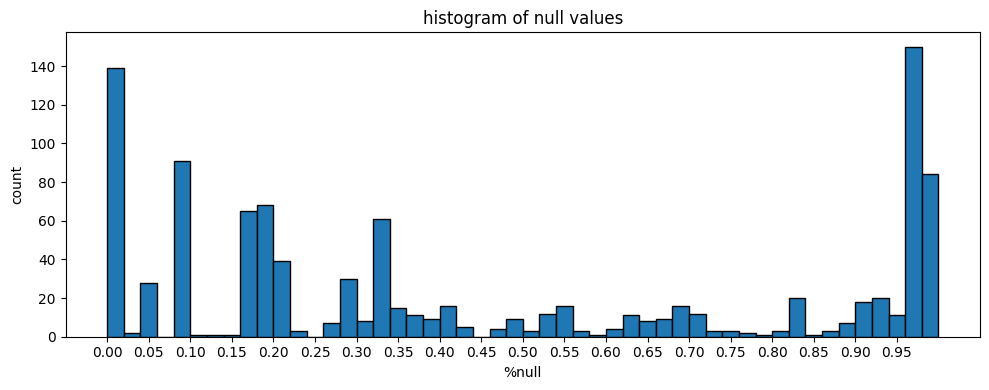

In [75]:
plt.figure(figsize=(10,4))
plt.hist(perc_null, bins=50, edgecolor='black')
plt.xlabel('%null')
plt.ylabel('count')
plt.xticks(np.arange(0, 1, 0.05))
plt.title('histogram of null values')
plt.tight_layout()
plt.savefig('%null.png')

In [29]:
sum(perc_null>0.95)

np.int64(240)

In [30]:
sum(perc_null>0.95)/len(df.columns)

np.float64(0.23210831721470018)

In [31]:
sum((perc_null>0.15)&(perc_null<0.4))

np.int64(316)

In [32]:
sum((perc_null>0.15)&(perc_null<0.4))/len(df.columns)

np.float64(0.3056092843326886)

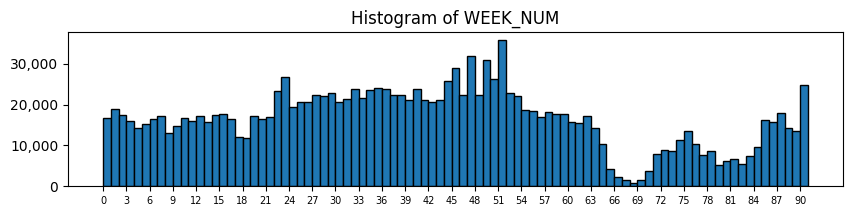

In [72]:
import matplotlib.ticker as mticker
plt.figure(figsize=(10,2))
plt.hist(df['WEEK_NUM'], bins=91, edgecolor='black')
plt.xticks(np.arange(0, 92, 3), fontsize=7)
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.title('Histogram of WEEK_NUM')
plt.savefig('week.png')